LINEAR REGRESSING ALGORITHM

* * inporting the libraries 


In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# df = sns.load_dataset("mpg")



df = pd.read_csv("linear/mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


remove data that is not necessary

In [ ]:
df.drop(['name'], axis=1, inplace=True)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [ ]:
# basic stats

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data Preprocessing**

In [ ]:
# to look at the null variables 


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [ ]:
df[df.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [ ]:
df.isnull().sum().any()

# to double check if there are any null

False

In [ ]:
df.shape

(392, 8)

**Univariate Analysis**

exploratory

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [ ]:
# we wnt to see the unique variables of the cylinder 

dfc = df['cylinders'].unique()
dfc = pd.DataFrame(data=dfc)
dfc

,0
0,8
1,4
2,6
3,3
4,5


In [ ]:
# df.cylinders.unique() other way

In [ ]:
df.cylinders.value_counts()

# total number of observations 

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

lets ty to visualize the data 

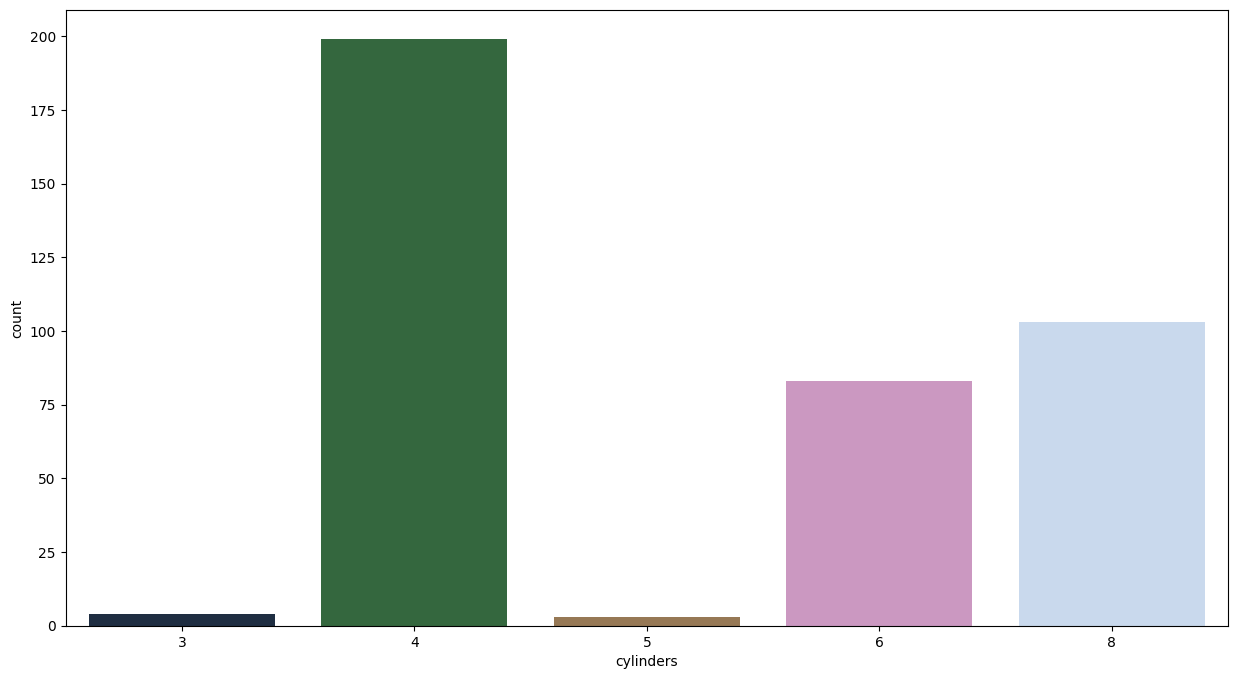

In [ ]:
# plt.figure(figsize=(15,8))
# # now lets creating the graphic 

# sns.countplot(df['cylinders'], data = df, palette="cubehelix")
# plt.show()


plt.figure(figsize=(15,8))
# now lets creating the graphic 

sns.countplot(x='cylinders', data = df, palette="cubehelix")
plt.show()

In [ ]:
#   call the data dataframe again

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


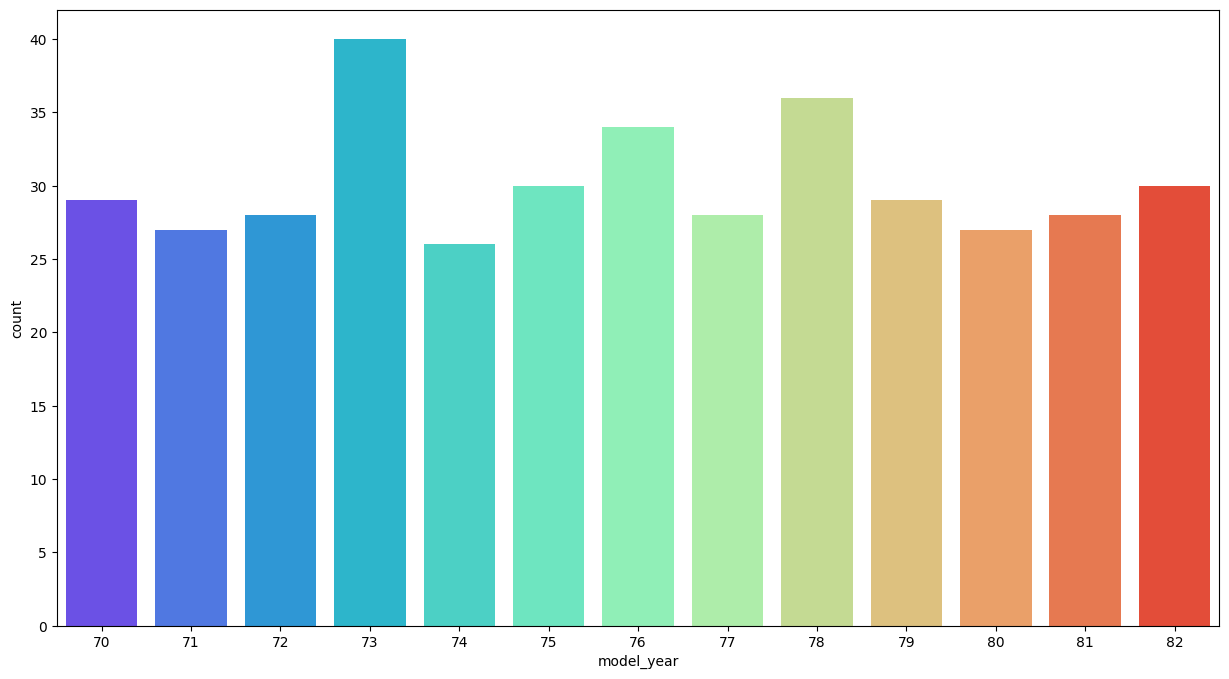

In [ ]:
plt.figure(figsize=(15,8))
# now lets creating the graphic 

sns.countplot(x='model_year', data = df, palette="rainbow")
plt.show()

# below the model year isnt right so we have to fix it 

In [ ]:
# lets fix the model year
df["model_year"] = (1900 + df.model_year)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


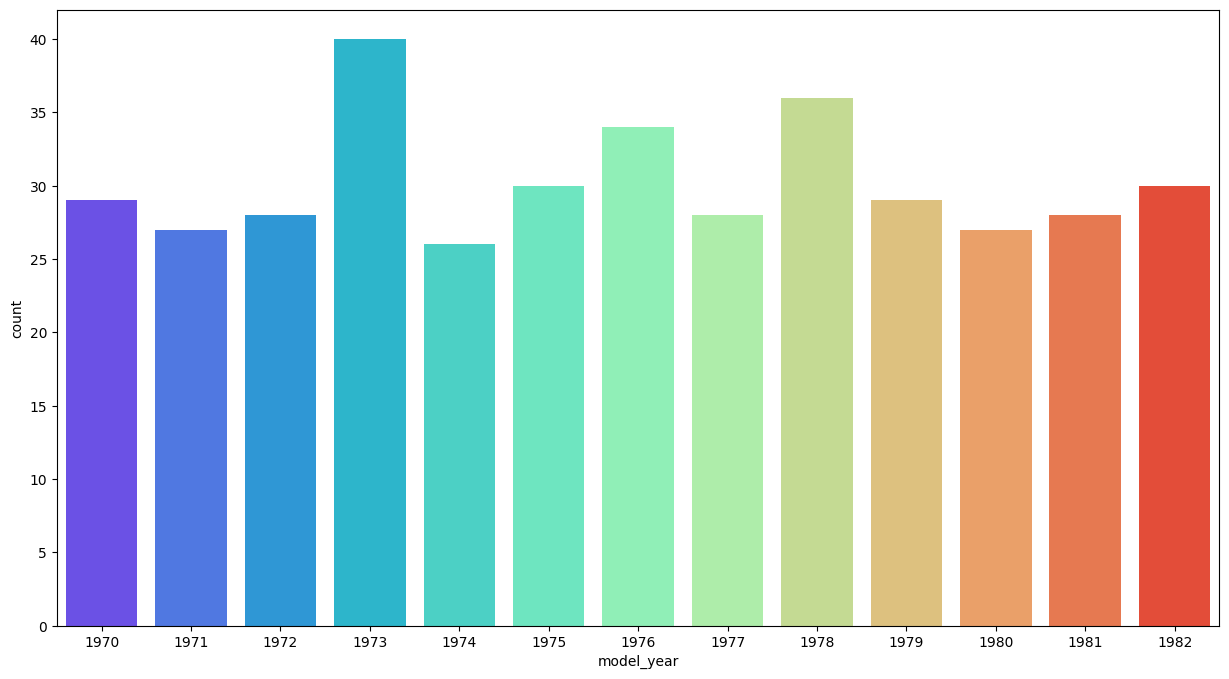

In [ ]:
# rain bow 

plt.figure(figsize=(15,8))
# now lets creating the graphic 

sns.countplot(x='model_year', data = df, palette="rainbow")
plt.show()

# now this is right 

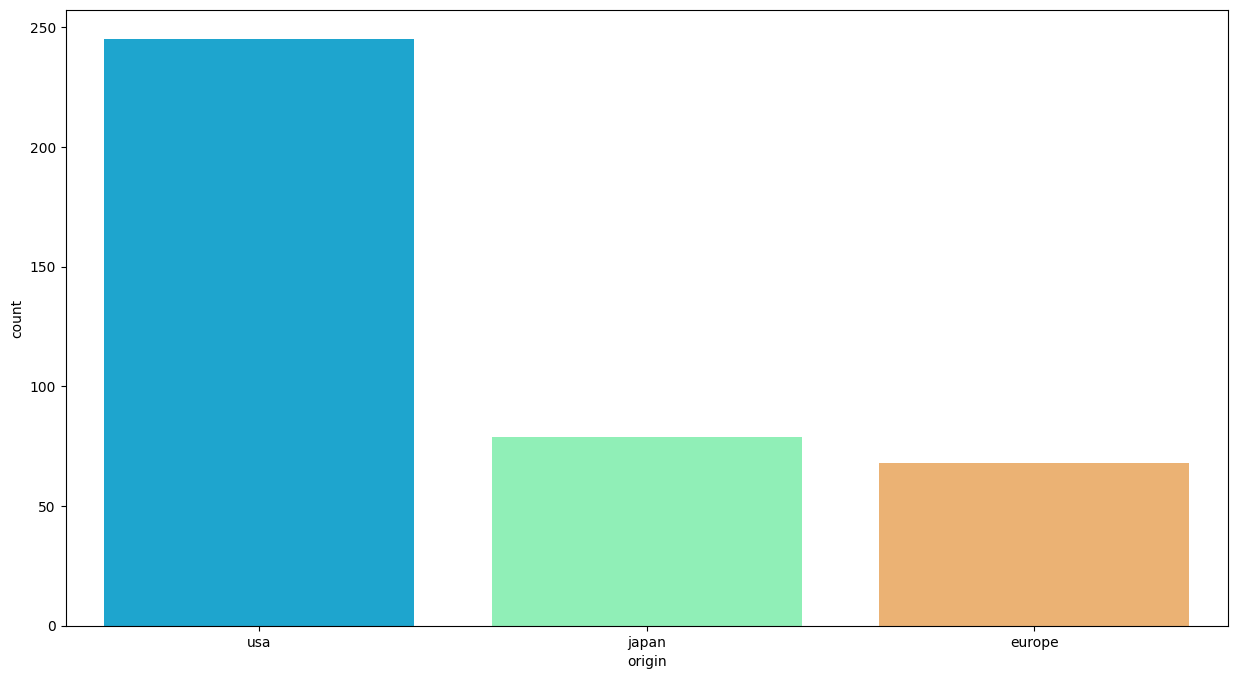

In [ ]:
# NOW THE ORIGIN COUNT 

plt.figure(figsize=(15,8))
# now lets creating the graphic 

sns.countplot(x='origin', data = df, palette="rainbow")
plt.show()

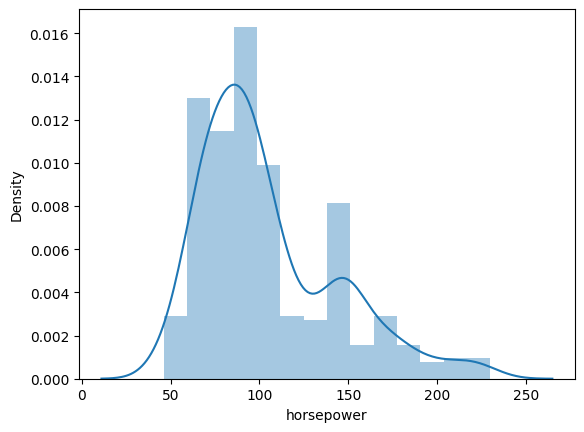

In [ ]:
# horse power  
# we want to check the scure 

# we will use the distplot

# plt.figure(figsize=(15,8))
# now lets creating the graphic 

sns.distplot(df["horsepower"])

# for spine in plt.gca().spines.values():
#     spine.set_visible(False)

plt.show()

# below here there is a left scu, most vehicles have 72 to 100 horse power

# there was a sadden increase were the vehicles increased by 150 horse power, it can be be investigated in binary analysis 

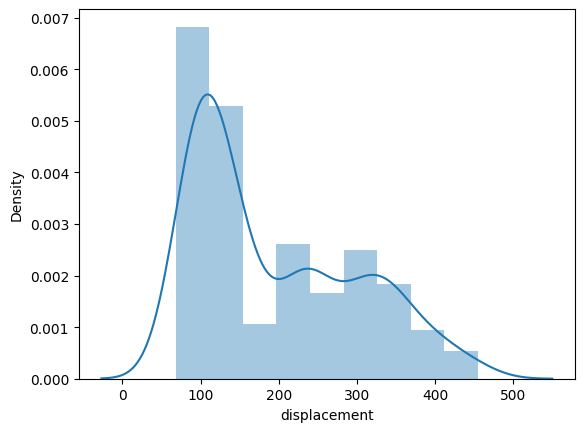

In [ ]:
sns.distplot(df.displacement)

plt.show()

# this is just another way we can write it  

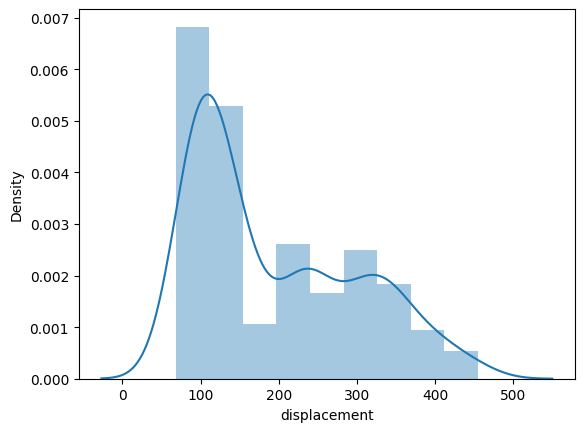

In [ ]:
# displacement

sns.distplot(df["displacement"])

# for spine in plt.gca().spines.values():
#     spine.set_visible(False)

plt.show()

# THE VOLUME OF THE MOTOR IS BETWEEN 100 AND 110

# BUT AFTER 200 THERE IS A DECREASE

In [ ]:
# NOTE IN UNVARIATE THE CHARACTERISTICS OF A VARIABLE ARE EXAMINED INDIVIDUALLY

# BIVARIATE ANALYSIS  

- HERE WE WILL TALK ABOUT THE SAME OF THE ISSUES WE WANTED TO SORT OUT 

In [ ]:
# MPG AND OTHER VARIABLES 

# BOXPLOT

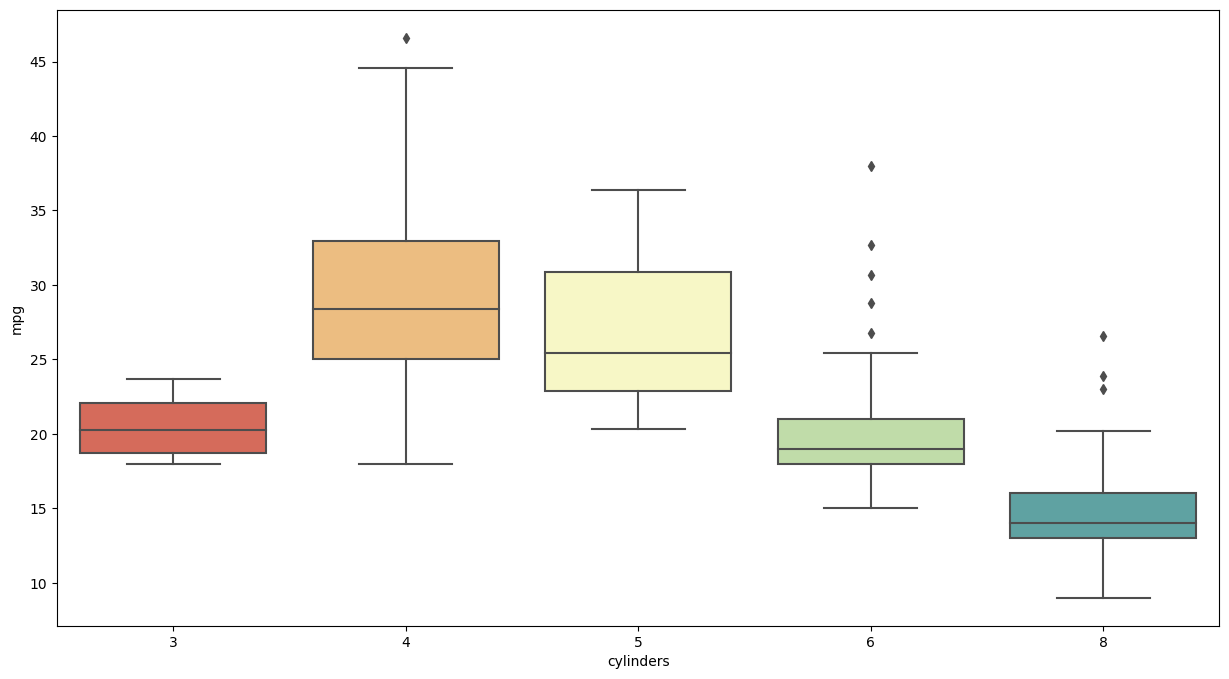

In [ ]:
plt.figure(figsize=(15, 8))

sns.boxplot(x="cylinders", y="mpg", data= df, palette= "Spectral")

plt.show()

# MPG, THE NUMBER OF CYLINDERS DECREASE AS THE NUBER OF CYLINDERS INCREASE 

#THE LOWER THE MPG VALUE THE MORE FUEL IT WILL CONSUME

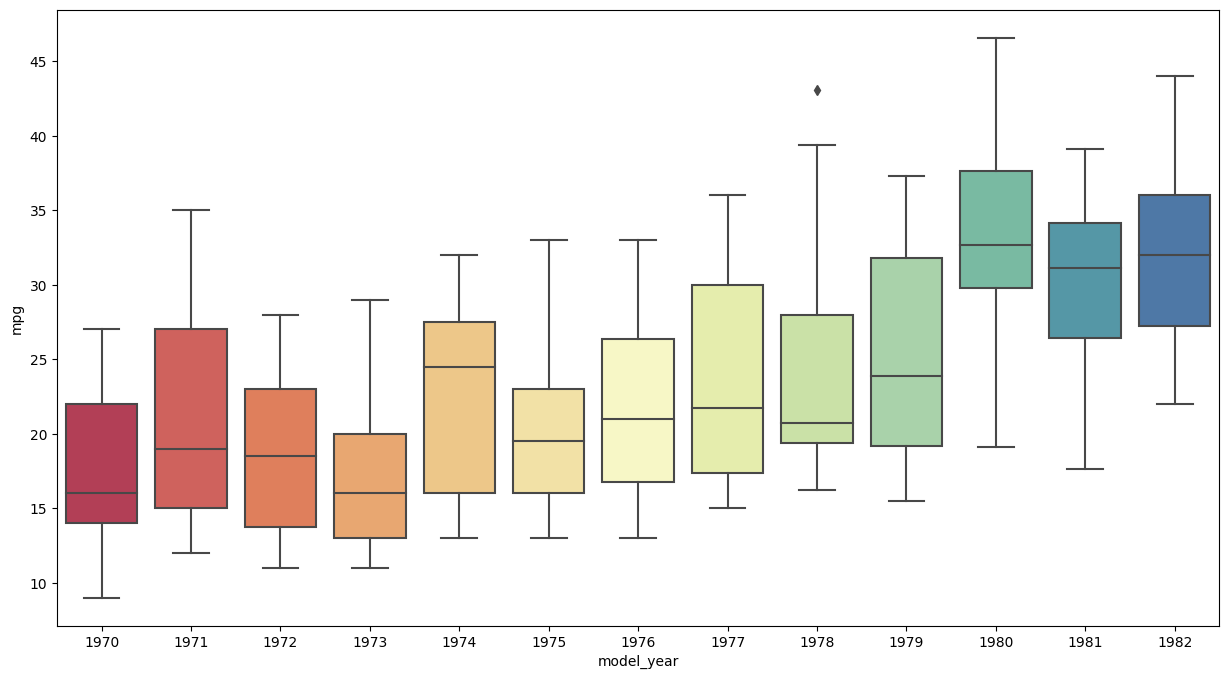

In [ ]:
# DO THE MODEL YEAR AFFECT THE MPG VALUE

plt.figure(figsize=(15, 8))

sns.boxplot(x="model_year", y="mpg", data= df, palette= "Spectral")

plt.show()

# as the years inncrease the mpg values increase with the newer models 

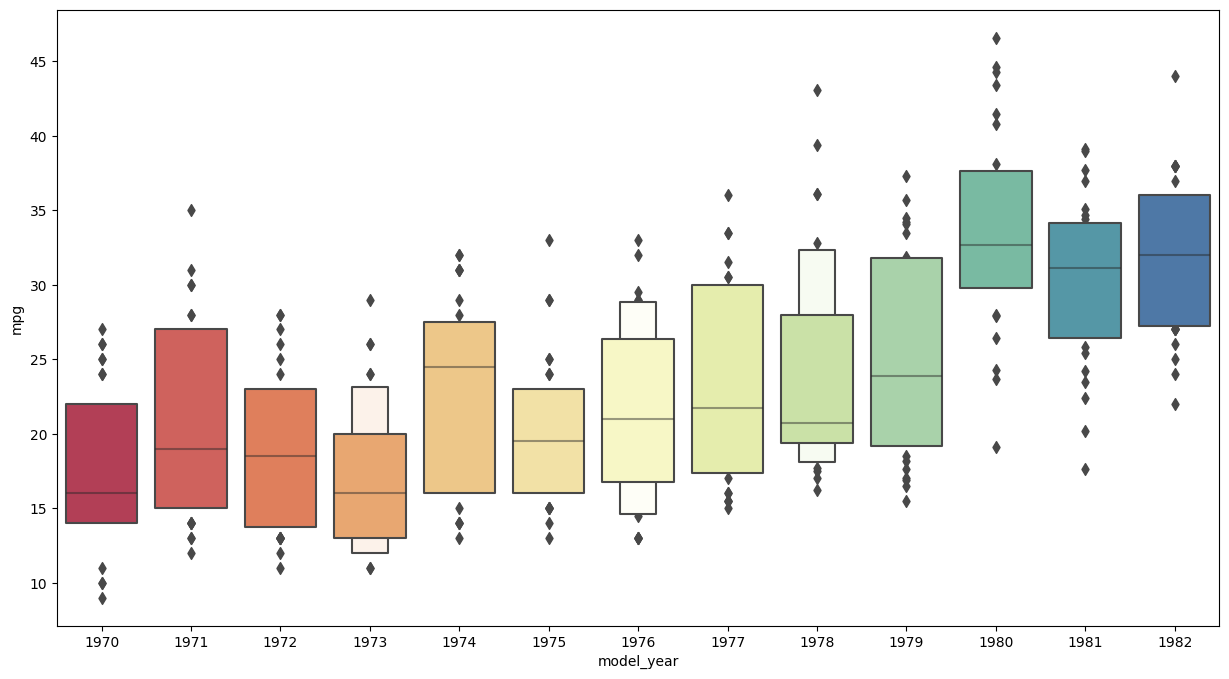

In [ ]:
plt.figure(figsize=(15, 8))

sns.boxenplot(x="model_year", y="mpg", data= df, palette= "Spectral")

plt.show()

# my own stuff

In [ ]:
#lets try to find what happened in 1980

nineteen_80 = df.where(df["model_year"] == 1980).dropna() 

nineteen_80

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
309,41.5,4.0,98.0,76.0,2144.0,14.7,1980.0,europe
310,38.1,4.0,89.0,60.0,1968.0,18.8,1980.0,japan
311,32.1,4.0,98.0,70.0,2120.0,15.5,1980.0,usa
312,37.2,4.0,86.0,65.0,2019.0,16.4,1980.0,japan
313,28.0,4.0,151.0,90.0,2678.0,16.5,1980.0,usa
314,26.4,4.0,140.0,88.0,2870.0,18.1,1980.0,usa
315,24.3,4.0,151.0,90.0,3003.0,20.1,1980.0,usa
316,19.1,6.0,225.0,90.0,3381.0,18.7,1980.0,usa
317,34.3,4.0,97.0,78.0,2188.0,15.8,1980.0,europe
318,29.8,4.0,134.0,90.0,2711.0,15.5,1980.0,japan


In [ ]:
#lets try to find what happened in 1980

nineteen_70 = df.where(df["model_year"] == 1970).dropna() 

nineteen_70

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970.0,usa
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970.0,usa
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970.0,usa
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970.0,usa
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970.0,usa
5,15.0,8.0,429.0,198.0,4341.0,10.0,1970.0,usa
6,14.0,8.0,454.0,220.0,4354.0,9.0,1970.0,usa
7,14.0,8.0,440.0,215.0,4312.0,8.5,1970.0,usa
8,14.0,8.0,455.0,225.0,4425.0,10.0,1970.0,usa
9,15.0,8.0,390.0,190.0,3850.0,8.5,1970.0,usa


In [ ]:
#lets try to find what happened in 1980

nineteen_82 = df.where(df["model_year"] == 1982).dropna() 

nineteen_82

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
367,28.0,4.0,112.0,88.0,2605.0,19.6,1982.0,usa
368,27.0,4.0,112.0,88.0,2640.0,18.6,1982.0,usa
369,34.0,4.0,112.0,88.0,2395.0,18.0,1982.0,usa
370,31.0,4.0,112.0,85.0,2575.0,16.2,1982.0,usa
371,29.0,4.0,135.0,84.0,2525.0,16.0,1982.0,usa
372,27.0,4.0,151.0,90.0,2735.0,18.0,1982.0,usa
373,24.0,4.0,140.0,92.0,2865.0,16.4,1982.0,usa
375,36.0,4.0,105.0,74.0,1980.0,15.3,1982.0,europe
376,37.0,4.0,91.0,68.0,2025.0,18.2,1982.0,japan
377,31.0,4.0,91.0,68.0,1970.0,17.6,1982.0,japan


In [ ]:
seventies = nineteen_70.cylinders.value_counts()
print("1970: ", seventies)


# total number of observations 

1970:  cylinders
8.0    18
4.0     7
6.0     4
Name: count, dtype: int64


In [ ]:
eighty = nineteen_80.cylinders.value_counts()
print("1970: ", eighty)

1970:  cylinders
4.0    23
6.0     2
5.0     1
3.0     1
Name: count, dtype: int64


In [ ]:
eighty_2 = nineteen_82.cylinders.value_counts()
print("1970: ", eighty_2)

1970:  cylinders
4.0    27
6.0     3
Name: count, dtype: int64


In [ ]:
dfdee = df
dfdee


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa
394,44.0,4,97.0,52.0,2130,24.6,1982,europe
395,32.0,4,135.0,84.0,2295,11.6,1982,usa
396,28.0,4,120.0,79.0,2625,18.6,1982,usa


In [ ]:
# Save dfdee to CSV
dfdee.to_csv('dfdee.csv', index=False)

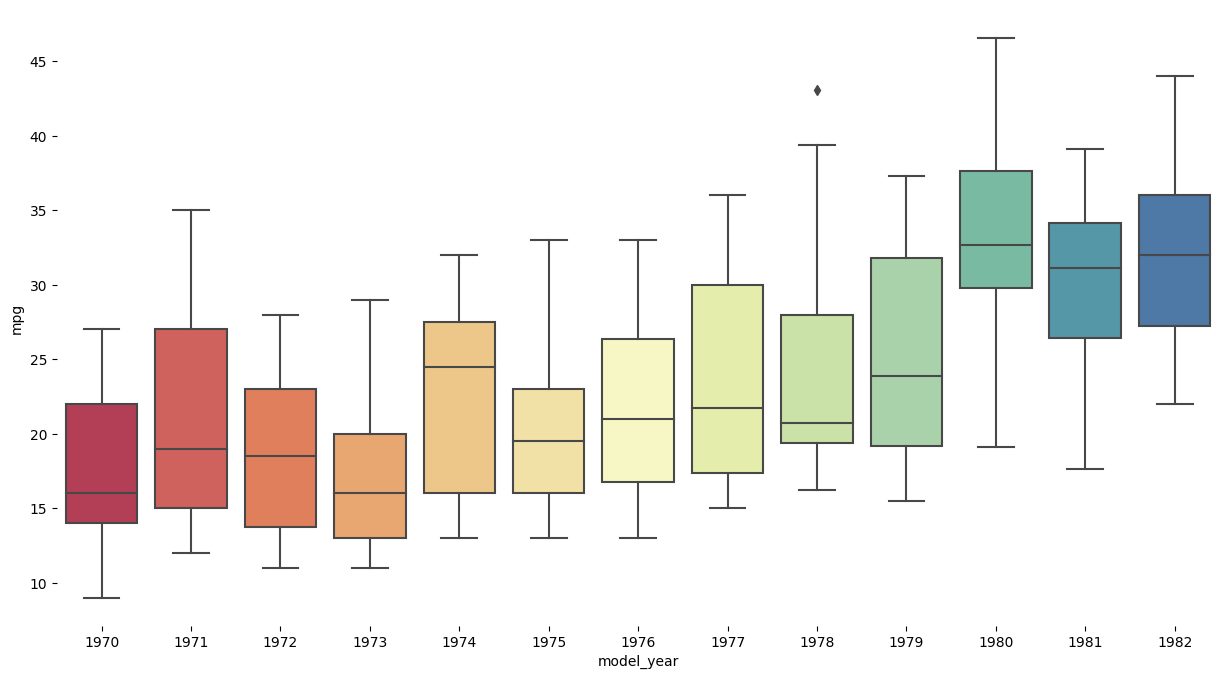

In [ ]:
# lets get back.......................

# DO THE MODEL YEAR AFFECT THE MPG VALUE

plt.figure(figsize=(15, 8))

sns.boxplot(x="model_year", y="mpg", data= df, palette= "Spectral")

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

# as the years inncrease the mpg values increase with the newer models 

# MULTIVARIATE ANALYSIS 

In [ ]:
# TO SPECIFY MORE THAN TWO VARIABLES TO SEE THERE RELATION WITH EACH OTHER 

#IMPLOT 

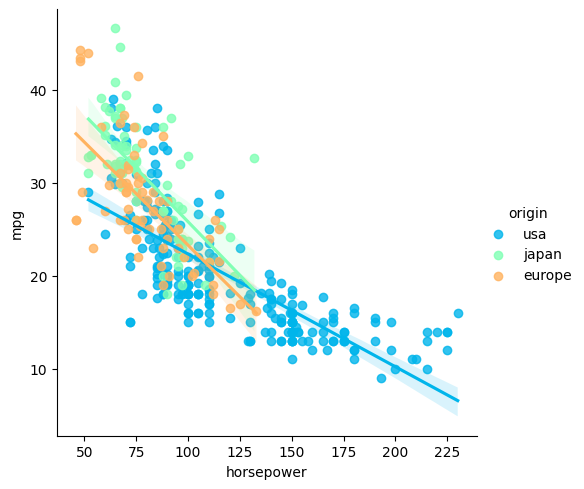

In [ ]:
# DIFFERENCE IN MPG, HOUSEPOWER BY COOUNTRY(origin) 

sns.lmplot(x = "horsepower", y = "mpg", hue = "origin", data = df, palette = "rainbow")
plt.show()

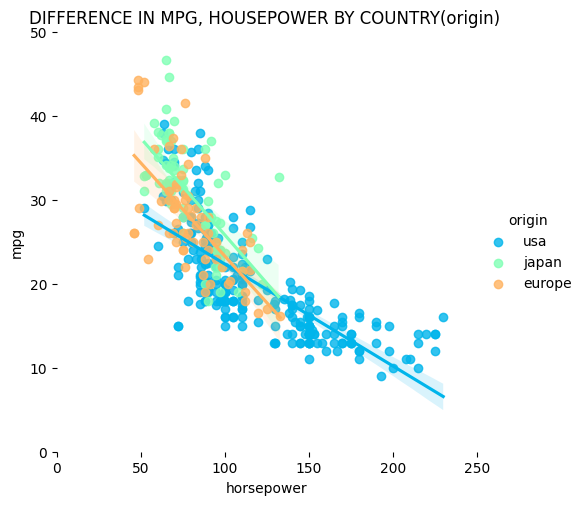

In [ ]:
# lets define the boundaries of this axes 

# DIFFERENCE IN MPG, HOUSEPOWER BY COUNTRY(origin) 

graph = sns.lmplot(x = "horsepower", y = "mpg", hue = "origin", data = df, palette = "rainbow")

graph.set(title="DIFFERENCE IN MPG, HOUSEPOWER BY COUNTRY(origin) ", alpha=0.2, box_aspect= 1)
# determine the boundaries of the x axes 
graph.set(xlim=(0,250))
graph.set(ylim=(0,50))



for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

# try tableau on this one 
# the mpg decreases by the increase in horse power 
# the softest reduction appeares to haappen in the usa 
# the number of vehicles in the usa is much higher than the other two groups

#if we just evaluate the other two groups themselves we might reach a more aquarate result   

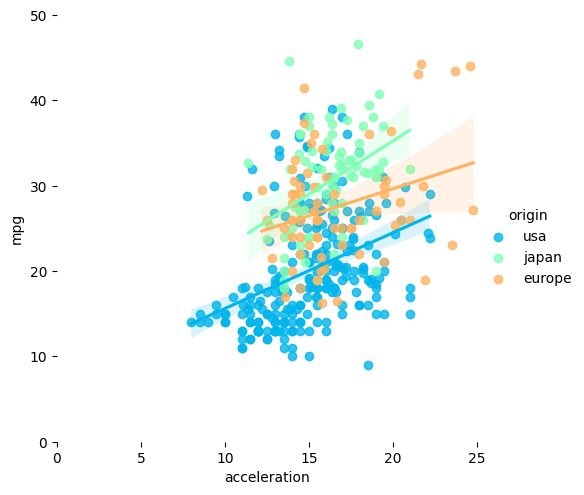

In [ ]:
graph = sns.lmplot(x = "acceleration", y = "mpg", hue = "origin", data = df, palette = "rainbow")

# determine the boundaries of the x axes 
graph.set(ylim=(0,50))
graph.set(xlim=(0,25))



for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()


# as the acceration increases the mpg value also increases 
# europian cars is at the lowest

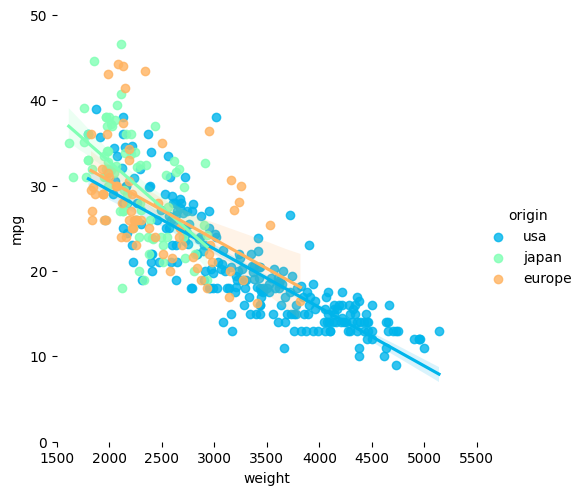

In [ ]:
graph = sns.lmplot(x = "weight", y = "mpg", hue = "origin", data = df, palette = "rainbow")

# determine the boundaries of the x axes 
graph.set(ylim=(0,50))
graph.set(xlim=(1500,5500))




for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

# after weiht 3500 there is no increase of cars of japanies and european origin
# cars in the usa can weigh upto 5200
#as there weight increases the mpg value decreases for the 3




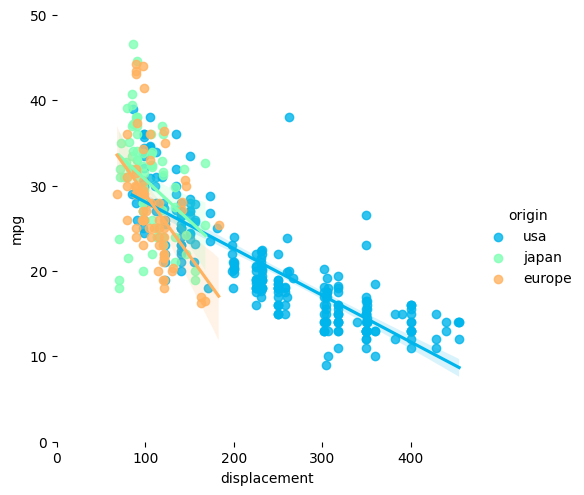

In [ ]:
graph = sns.lmplot(x = "displacement", y = "mpg", hue = "origin", data = df, palette = "rainbow")

# determine the boundaries of the x axes 
graph.set(ylim=(0,50))
graph.set(xlim=(0,475))



for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

# the mpg decreases when the engine volume(displacement) increases to all countries 
# after the value 180 there is o increase in the origins japan and europe
# there is a large volume decrease in usa cars 


PRACTICE

# PART 3 

BY DETERMINING THE VARIABLES THAT WE WILL ENTER INTO THE MODEL, WE WILL CONVERT ALL OF THE VARIABLES INTO THE FORMAT THAT WE ENTER INTO THE MODEL

In [ ]:
# HEATMAP
# - USED TO VISUALISE THE RELATIONSHIP BETWEEN THE VARIABLES 

** HEAT MAP OF CORRELATION MATRIX **

In [ ]:
#set the figsize parameter 

plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="Spectral") 
plt.show()

ValueError: could not convert string to float: 'usa'

<Figure size 1500x900 with 0 Axes>

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
39

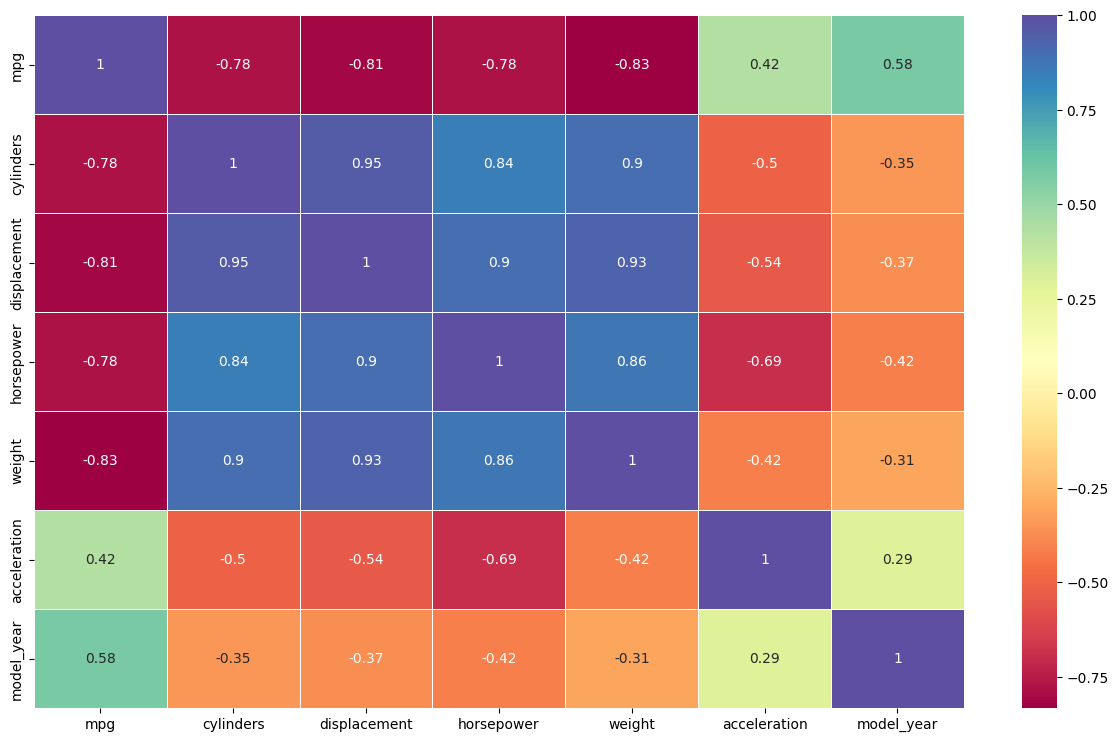

In [ ]:

# Assuming df is your DataFrame

# Step 1: Identify non-numeric columns
print(df.dtypes)

# Step 2: Locate the problematic values
df_numeric = df.apply(pd.to_numeric, errors='coerce')
non_numeric_rows = df_numeric[df_numeric.isna().any(axis=1)]
print(non_numeric_rows)

# Step 3: Clean the data
# Option 1: Remove non-numeric rows
# df_cleaned = df_numeric.dropna()
df_cleaned = df_numeric.dropna(axis=1, how='any')


# Option 2: Remove non-numeric columns (uncomment if preferred)
# df_cleaned = df.select_dtypes(include=[np.number])

# Step 4: Recompute the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(df_cleaned.corr(), annot=True, linewidths=0.5, cmap='Spectral')
plt.show()

In [ ]:
df_cleaned

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,1970
1,15.0,8,350.0,165.0,3693,11.5,1970
2,18.0,8,318.0,150.0,3436,11.0,1970
3,16.0,8,304.0,150.0,3433,12.0,1970
4,17.0,8,302.0,140.0,3449,10.5,1970
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982
394,44.0,4,97.0,52.0,2130,24.6,1982
395,32.0,4,135.0,84.0,2295,11.6,1982
396,28.0,4,120.0,79.0,2625,18.6,1982


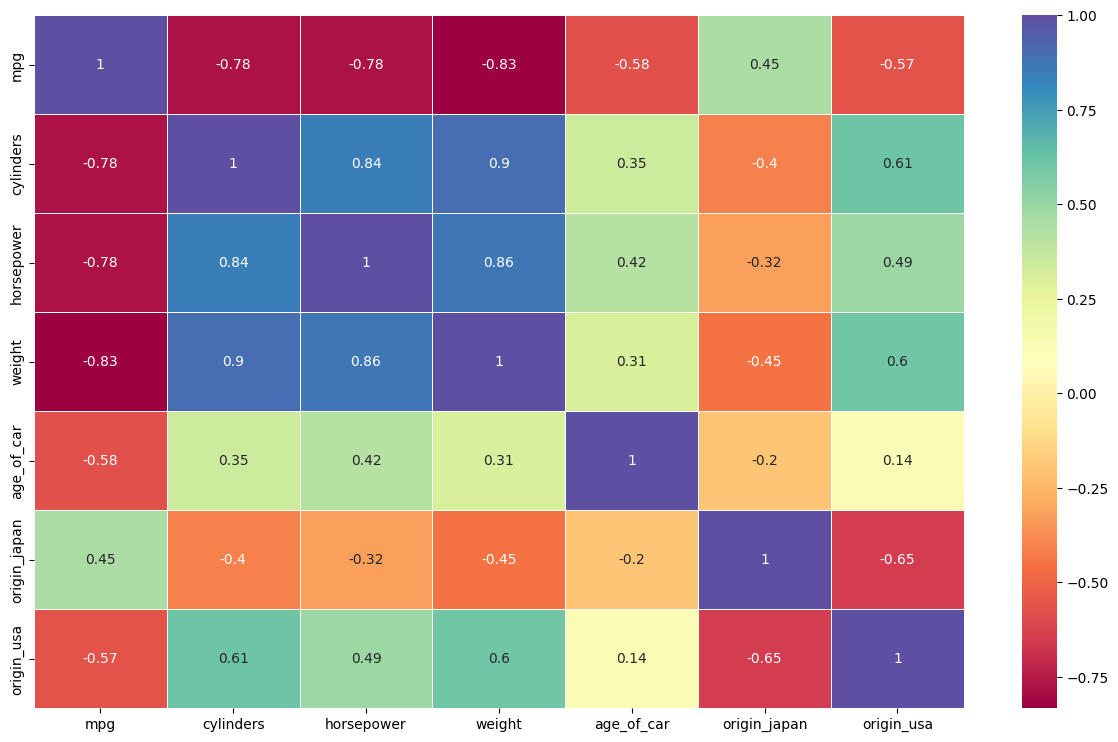

In [ ]:
plt.figure(figsize=(15, 9))
sns.heatmap(df_cleaned.corr(), annot=True, linewidths=0.5, cmap='Spectral')
plt.show()

#
# Understanding Correlation Coefficient
# Correlation Coefficient (r): It measures the strength and direction of a linear relationship between two variables.
# r = 1: Perfect positive correlation.
# r = -1: Perfect negative correlation.
# r = 0: No correlation.
# Values close to 1 or -1 indicate a strong relationship, while values close to 0 indicate a weak relationship.
# Variables
# The variables in the dataset seem to be:

# mpg: Miles per gallon (fuel efficiency)
# cylinders: Number of cylinders in the engine
# displacement: Engine displacement
# horsepower: Engine horsepower
# weight: Vehicle weight
# acceleration: Time taken to accelerate from 0 to 60 mph
# model_year: Year of the car model
# Key Insights
# mpg (Miles per gallon):

# Negatively correlated with cylinders (-0.78), displacement (-0.81), horsepower (-0.78), and weight (-0.83).
# This implies that cars with more cylinders, larger engine displacement, higher horsepower, and greater weight tend to have lower fuel efficiency.
# Positively correlated with acceleration (0.42) and model_year (0.58).
# This suggests that newer cars and those with better acceleration (faster 0-60 mph time) tend to be more fuel-efficient.
# cylinders:

# Highly positively correlated with displacement (0.95), horsepower (0.84), and weight (0.90).
# Cars with more cylinders tend to have larger engine displacement, higher horsepower, and greater weight.
# Negatively correlated with acceleration (-0.50) and model_year (-0.50).
# Cars with more cylinders tend to have slower acceleration and are typically older models.
# displacement:

# Highly positively correlated with horsepower (0.90) and weight (0.93).
# Larger engine displacement is associated with higher horsepower and greater weight.
# Negatively correlated with acceleration (-0.54) and model_year (-0.37).
# Larger displacement engines tend to have slower acceleration and are often found in older models.
# horsepower:

# Positively correlated with weight (0.86).
# Cars with higher horsepower tend to be heavier.
# Negatively correlated with acceleration (-0.69) and model_year (-0.42).
# Higher horsepower is associated with slower acceleration and older models.
# weight:

# Negatively correlated with acceleration (-0.42) and model_year (-0.31).
# Heavier cars tend to have slower acceleration and are often older models.
# acceleration:

# Positively correlated with model_year (0.29).
# Newer car models tend to have better acceleration.
# Summary
# Fuel Efficiency (mpg): Inversely related to engine size, power, and weight; positively related to newer models and better acceleration.
# Engine and Performance: More cylinders are linked to larger displacement, higher horsepower, and greater weight but are less fuel-efficient and typically slower in acceleration.
# Vehicle Weight: Heavier vehicles generally have larger engines, more power, and lower fuel efficiency; they tend to be older models.
# This correlation matrix provides valuable insights into how different car features and performance metrics are interrelated.

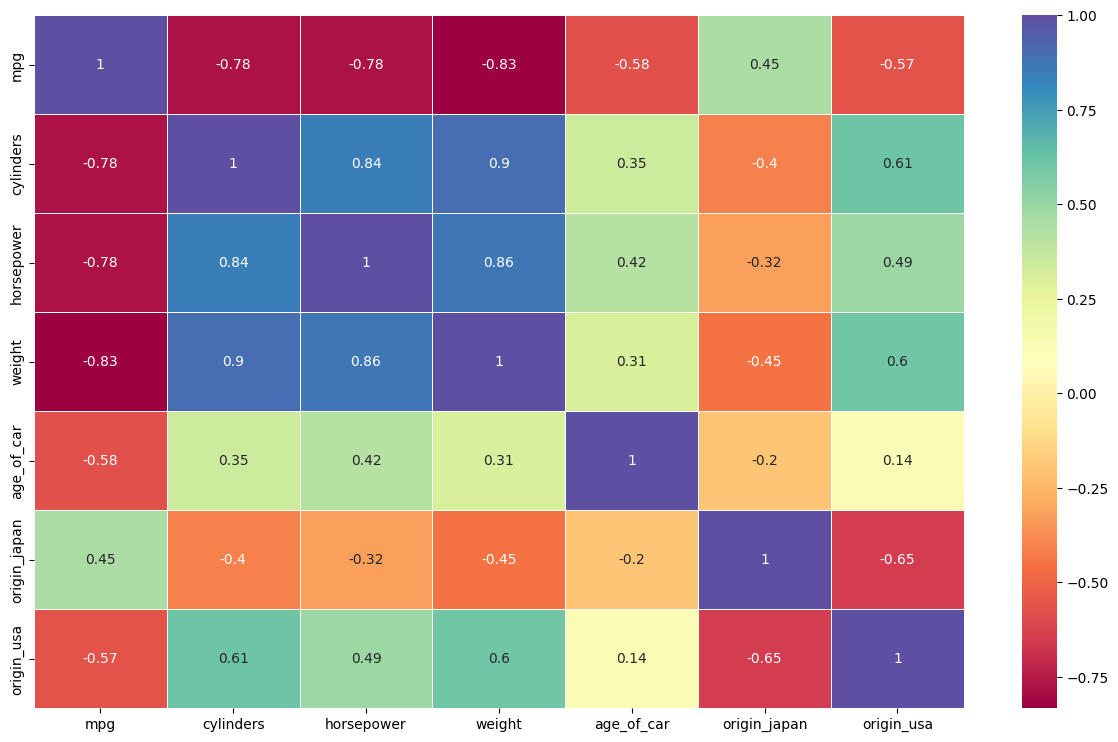

In [ ]:
plt.figure(figsize=(15, 9))
sns.heatmap(df_cleaned.corr(), annot=True, linewidths=0.5, cmap='Spectral')
plt.show()

# if the variables that have too many correlations with each other, other than mpg, we will remove on of them from the data set because 
#  if there are two highely correlated variables with each other, it means both have the power to predict the mpg variable
# there is no need to complicate the model by uncessary puting both in the model

# OUR PRIMARY GOAL IS TO MAKE THE HIGHEST ESTIMATION WITH THE LEAST VARIABLE
# IT MEANS WE DONT GIVE TOO MANY VARIABLES TOT THE MODEL

# SO WE CAN REMOVE ACCELERATION AND DISPLACEMENT FROM THE DATA SET  

In [ ]:
# LETS DROP
# df_cleaned.drop(["acceleration", "displacement"], axis=1, inplace=True)
df.drop(["acceleration", "displacement"], axis=1, inplace=True)

# was done already///

KeyError: "['acceleration', 'displacement'] not found in axis"

In [ ]:
# # df_cleaned.drop(["acceleration", "displacement"], axis=1, inplace=True)
# df_cleaned

# TRY OUT 

In [ ]:
# plt.figure(figsize=(15, 9))
# sns.heatmap(df_cleaned.corr(), annot=True, linewidths=0.5, cmap='Spectral')
# plt.show()

# TRY OUT 

In [ ]:
df.head()

,mpg,cylinders,horsepower,weight,age_of_car,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1


In [ ]:
# df["origin"].isnull().sum().any()

now we want to create a variable of age of the cars by using todays data - the date in the data set 

In [ ]:
# import the datatime 

from datetime import datetime

In [ ]:
today = datetime.today()
today

datetime.datetime(2024, 5, 31, 10, 27, 34, 703666)

In [ ]:
# today = datetime.today().year
# today

this_year = today.year
this_year

2024

In [ ]:
# now lets create the variable age 

df["age_of_car"] = this_year - df.model_year

AttributeError: 'DataFrame' object has no attribute 'model_year'

In [ ]:
df

,mpg,cylinders,horsepower,weight,age_of_car,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,42,0,1
394,44.0,4,52.0,2130,42,0,0
395,32.0,4,84.0,2295,42,0,1
396,28.0,4,79.0,2625,42,0,1


In [ ]:
df.drop(["model_year"], axis=1, inplace=True)

KeyError: "['model_year'] not found in axis"

In [ ]:
df

,mpg,cylinders,horsepower,weight,age_of_car,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,42,0,1
394,44.0,4,52.0,2130,42,0,0
395,32.0,4,84.0,2295,42,0,1
396,28.0,4,79.0,2625,42,0,1


now the origin variable 


In [ ]:
df.origin.unique()

# this values re categorical
# we need to convert then into a language the model will understand 

AttributeError: 'DataFrame' object has no attribute 'origin'

In [ ]:
# here the chategorical data in the dataframe will be exposed to the get dummies structure 
# THIS IS DONE TO PREPARE OUR DATA FOR OUR MODEL
df = pd.get_dummies(df, drop_first= True)
df.head()


,mpg,cylinders,horsepower,weight,age_of_car,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1


In [ ]:
df

,mpg,cylinders,horsepower,weight,age_of_car,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,42,0,1
394,44.0,4,52.0,2130,42,0,0
395,32.0,4,84.0,2295,42,0,1
396,28.0,4,79.0,2625,42,0,1


In [ ]:
df_cleaned = df
df_cleaned

# try out just making dfcleaned to df 

,mpg,cylinders,horsepower,weight,age_of_car,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,42,0,1
394,44.0,4,52.0,2130,42,0,0
395,32.0,4,84.0,2295,42,0,1
396,28.0,4,79.0,2625,42,0,1


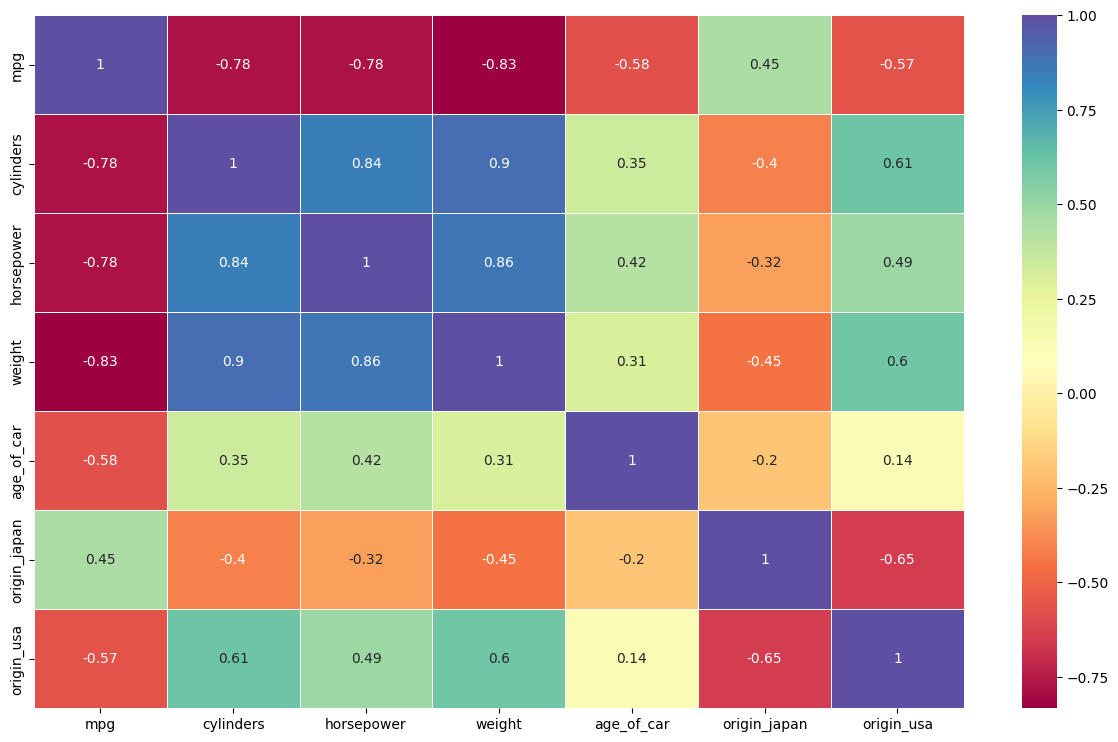

In [ ]:
plt.figure(figsize=(15, 9))
sns.heatmap(df_cleaned.corr(), annot=True, linewidths=0.5, cmap='Spectral')
plt.show()

In [ ]:
df

,mpg,cylinders,horsepower,weight,age_of_car,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,42,0,1
394,44.0,4,52.0,2130,42,0,0
395,32.0,4,84.0,2295,42,0,1
396,28.0,4,79.0,2625,42,0,1


In [ ]:
df["origin_japan"] = df["origin_japan"].astype(int)
df["origin_usa"] = df["origin_usa"].astype(int)

In [ ]:
df

,mpg,cylinders,horsepower,weight,age_of_car,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,42,0,1
394,44.0,4,52.0,2130,42,0,0
395,32.0,4,84.0,2295,42,0,1
396,28.0,4,79.0,2625,42,0,1


modeliling try out 

In [ ]:
XD = df.drop(["mpg"], axis=1)
XD

,cylinders,horsepower,weight,age_of_car,origin_japan,origin_usa
0,8,130.0,3504,54,0,1
1,8,165.0,3693,54,0,1
2,8,150.0,3436,54,0,1
3,8,150.0,3433,54,0,1
4,8,140.0,3449,54,0,1
...,...,...,...,...,...,...
393,4,86.0,2790,42,0,1
394,4,52.0,2130,42,0,0
395,4,84.0,2295,42,0,1
396,4,79.0,2625,42,0,1


In [ ]:
yd = df["mpg"]
yd

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

# now we go to modelling the data 


# Modelling 

In [ ]:
# Here we will define our 2 variables
# one of these variables will consist of an independent variable 
# the other variable will be the dependant variable("prediction variable ")

In [ ]:
X = df.drop(["mpg"], axis=1)
y = df["mpg"]

# we can achieve our goal if we remove the mpg variable from the entire data structure
# THE FIRST VARIABLE IS "X"
# SET X TO INDEPENDENT VARIABLE = df.drop(["mpg"], axis=1)
# y is the predicted variable

now we have to divid the about variables into test and train sets 

- while we train the model with "train", wil test the modelwith "test"

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# here we are spacifying the variable and giving the size we want to divide as a percentage
# this code will divide 20% by 80 percent
# set the random to 42 to see the same split, "like spliting the data training and test data"it is the most used 

In [ ]:
# lets see how the split happened 
X_train

,cylinders,horsepower,weight,age_of_car,origin_japan,origin_usa
260,6,110.0,3620,46,0,1
184,4,92.0,2572,48,0,1
174,6,97.0,2984,49,0,1
64,8,150.0,4135,52,0,1
344,4,64.0,1875,43,0,1
...,...,...,...,...,...,...
72,8,150.0,3892,52,0,1
107,6,100.0,2789,51,0,1
272,4,85.0,2855,46,0,1
352,4,65.0,2380,43,0,1


In [ ]:
# again lets see the split 

y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

okay above we have now made the data ready for modeling 

# Now we are going to start create our machine learnin model  

In [ ]:
# here we import our 
from sklearn.linear_model import LinearRegression

In [ ]:
# now we can start developing out model 

In [ ]:
# first we make the model object
# so we specify the variable name 

lm_model = LinearRegression()

lm_model #?# here our linear regression object has been created 

LinearRegression()

In [ ]:
# now and first we will train our data

lm_model.fit(X_train, y_train) # here we will put our traing data

# the model is now trained 

LinearRegression()

In [ ]:
# so here we will look at the intercept value   

lm_model.intercept_

# this means that when X = 0 the y value is this below and is the STARTING POINT 


79.80442103966979

In [ ]:
# now lets  look at the coefient of the other variables 

coef_param = pd.DataFrame(lm_model.coef_, index = X.columns, columns = ["Coeffient"])
coef_param

#  so here we are able to see the coeficient of the independent variables in this case and in the formula they represent "B1, B2..."
# NOTE THAT THIS DATA IS COEFIFIENT ANALYSIS IN RELATION TO "mpg" in Linear regresion 


,Coeffient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age_of_car,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Coefficients from the model
# coefficients = {
#     'Intercept': 79.8042139666979,
#     'Cylinders': 0.203056,
#     'Horsepower': -0.014143,
#     'Weight': -0.005729,
#     'Age of Car': -0.779904,
#     'Origin Japan': 0.401853,
#     'Origin USA': -2.385047
# }

# # Convert to DataFrame for easier plotting
# df_coefficients = pd.DataFrame(coefficients.items(), columns=['Feature', 'Coefficient'])

# # Plotting
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Coefficient', y='Feature', data=df_coefficients, palette='viridis')
# plt.title('Feature Importance in Linear Regression Model')
# plt.xlabel('Coefficient Value')
# plt.ylabel('Feature')
# plt.show()


In [ ]:
# now lets  look at the coefient of the other variables 

coef_param = pd.DataFrame(lm_model.coef_, index = X.columns, columns = ["Coeffient"])
coef_param

#  so here we are able to see the coeficient of the independent variables in this case and in the formula they represent "B1, B2..."
# NOTE THAT THIS DATA IS COEFIFIENT ANALYSIS IN RELATION TO "mpg" in Linear regresion 


# analysis

# 

,Coeffient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age_of_car,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


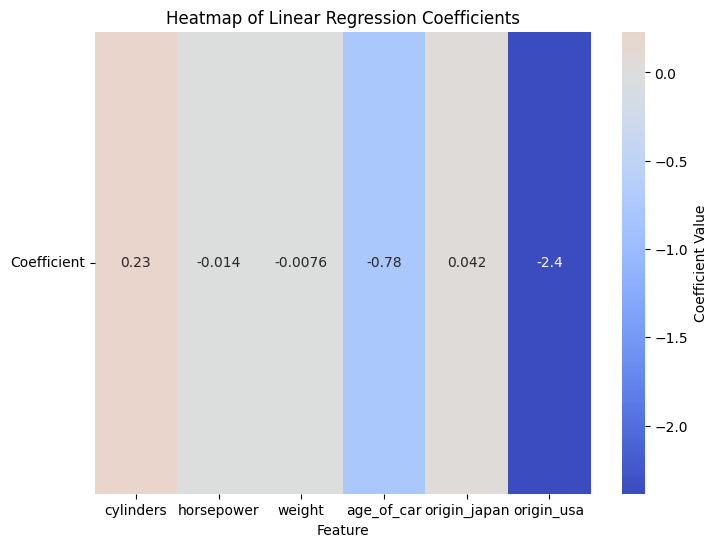

In [ ]:
# lets try to analyse this uusing heat map
# Data from the user's notebook
data = {
    'Feature': ['cylinders', 'horsepower', 'weight', 'age_of_car', 'origin_japan', 'origin_usa'],
    'Coefficient': [0.230356, -0.014143, -0.0075792, -0.779904, 0.041853, -2.385047]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw a heatmap
heatmap = sns.heatmap(df.set_index('Feature').T, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Coefficient Value'})
heatmap.set_title('Heatmap of Linear Regression Coefficients')
plt.yticks(rotation=0)  # Rotate y-axis labels

# Show the 
plt.show()


In [ ]:
# now like we check how accurate this model is 

y_pred = lm_model.predict(X_test)

In [ ]:
my_dict = {"Actual": y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [ ]:
compare.sample(10)

,Actual,Pred
366,17.6,24.048994
169,20.0,22.314063
335,35.0,30.734004
385,38.0,35.885766
56,26.0,24.706647
34,16.0,16.116050
358,31.6,31.340354
30,28.0,22.653558
147,24.0,28.484170
78,21.0,21.764759


In [ ]:
# metrix methods 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [ ]:
def evaluation_metrics(actual,pred): 
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual,pred))
    SCORE = r2_score(actual, pred)
    
    return print("r2_score", SCORE, "\n", "mae:", MAE, "\n", "mse:", MSE, '\n', "rmse:", RMSE)

In [ ]:
evaluation_metrics(y_test, y_pred)

r2_score 0.7798249880881912 
 mae: 2.518828157615086 
 mse: 11.237861022823031 
 rmse: 3.352291905968666


now we are ging to visualize our data 

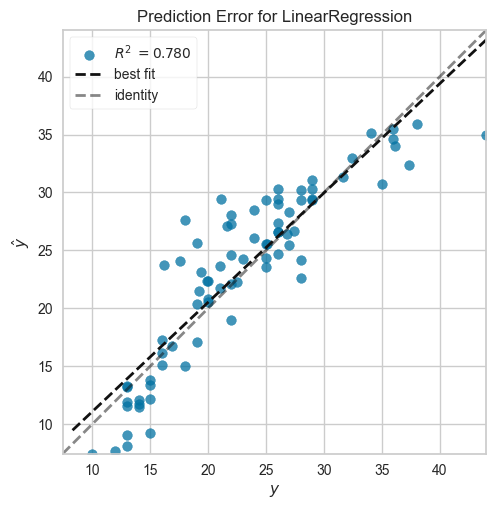

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lm_model)

# first train the visualizer object

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

In [ ]:
# visual for residual values 

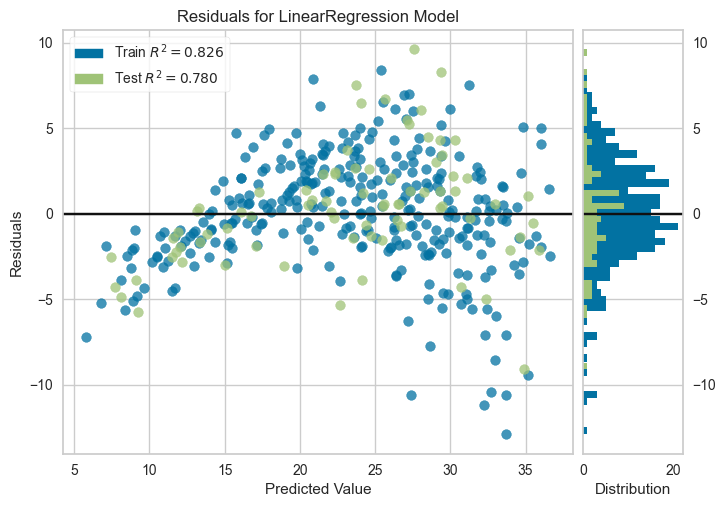

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm_model)

# first train the visualizer object

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

In [1]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB ? eta -

In [2]:
# just installing libs 

!pip install scipy



In [3]:
!pip install jupyter



In [4]:


# !pip install opencv-python

In [5]:


!pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/46.2 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/46.2 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/46.2 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/46.2 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/46.2 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/46.2 kB ? eta -:--:--
     -------------------------------------- 46.2/46.2 kB 115.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 0.1/377.0 MB 1.1 MB/s eta 0:05:32
   ---------------------------------------- 0.1/377.0 MB 1.1 MB/s eta 0:05:38
   ---------------------------------------- 0.2/377.0 MB 1.0 MB/s eta 0:06:13
   ------------------------

In [6]:
!pip install keras


In [7]:
!pip install statsmodels

In [8]:
# import tensorflow as tf

# # Print TensorFlow version
# print("TensorFlow version:", tf.__version__)

# # Load the MNIST dataset
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Normalize pixel values to a range of 0 to 1
# x_train, x_test = x_train / 255.0, x_test / 255.0

# # Build a neural network model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10)
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Train the model
# model.fit(x_train, y_train, epochs=5)

# # Evaluate the model
# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
# print("\nTest accuracy:", test_acc)


In [9]:
!pip3 install torch torchvision torchaudio


   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/159.8 MB 1.7 MB/s eta 0:01:37
   ---------------------------------------- 0.1/159.8 MB 1.2 MB/s eta 0:02:14
   ---------------------------------------- 0.2/159.8 MB 1.3 MB/s eta 0:02:03
   ---------------------------------------- 0.3/159.8 MB 1.3 MB/s eta 0:02:02
   ---------------------------------------- 0.4/159.8 MB 1.5 MB/s eta 0:01:48
   ---------------------------------------- 0.4/159.8 MB 1.5 MB/s eta 0:01:50
   ---------------------------------------- 0.5/159.8 MB 1.5 MB/s eta 0:01:47
   ---------------------------------------- 0.6/159.8 MB 1.5 MB/s eta 0:01:47
   ---------------------------------------- 0.7/159.8 MB 1.5 MB/s eta 0:01:45
   ---------------------------------------- 0.7/159.8 MB 1.6 MB/s eta 0:01:43
   ---------------------------------------- 0.8/159.8 MB 1.6 MB/s eta 0:01:41
   ---------------------------------------- 0.9/159.8 MB 1.6 MB/s eta 0

In [12]:
!pip install beautifulsoup4


In [13]:
!pip install pycaret

     ---------------------------------------- 0.0/165.0 kB ? eta -:--:--
     ------- -------------------------------- 30.7/165.0 kB ? eta -:--:--
     ------- -------------------------------- 30.7/165.0 kB ? eta -:--:--
     -------------------- ---------------- 92.2/165.0 kB 744.7 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.0 kB 744.7 kB/s eta 0:00:01
     -----------------------------------  163.8/165.0 kB 701.4 kB/s eta 0:00:01
     -----------------------------------  163.8/165.0 kB 701.4 kB/s eta 0:00:01
     ------------------------------------ 165.0/165.0 kB 521.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/50.9 kB ? eta -:--:--
     ------------------------------ ------- 41.0/50.9 kB 960.0 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/50.9 kB 960.0 kB/s eta 0:00:01
     ------------------------------ ------- 4